### Imports

In [2]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
import seaborn as sns
import xtrack as xt
import xpart as xp
import json

# Improve style
sns.set_theme(style="whitegrid")
%config InlineBackend.figure_format='retina'


Start with Multiline with Guido json file

Done loading line from dict.           
Done loading line from dict.           
Done loading line from dict.           
Done loading line from dict.           
Found suitable prebuilt kernel `default_bb3d`.
Found suitable prebuilt kernel `default_bb3d`.
Found suitable prebuilt kernel `default_only_xtrack`.
Found suitable prebuilt kernel `default_only_xtrack`.
Tracking particles for footprint...
Done tracking.
Computing footprint...
Done computing footprint.
Tracking particles for footprint...
Done tracking.
Computing footprint...
Done computing footprint.
Tracking particles for footprint...
Done tracking.
Computing footprint...
Done computing footprint.
Tracking particles for footprint...
Done tracking.
Computing footprint...
Done computing footprint.


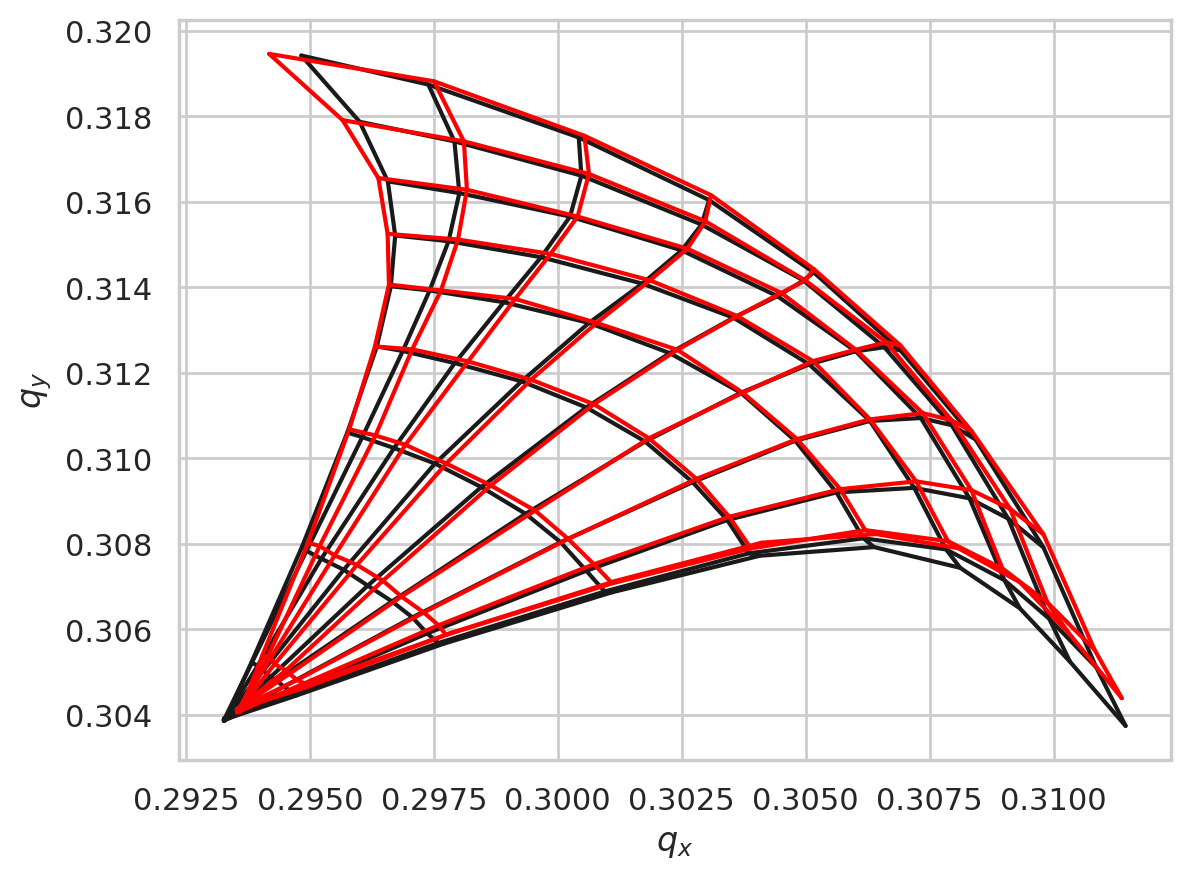

In [3]:
collider = xt.Multiline.from_json(
    "/afs/cern.ch/user/s/sterbini/public/collider_03_tuned_bb_on.json"
)
collider.build_trackers()

fp = collider["lhcb1"].get_footprint(
    nemitt_x=2.5e-6,
    nemitt_y=2.5e-6,
    linear_rescale_on_knobs=[xt.LinearRescale(knob_name="beambeam_scale", v0=0, dv=0.1)],
)
fp.plot()


fp = collider["lhcb1"].get_footprint(
    nemitt_x=2.5e-6,
    nemitt_y=2.5e-6,
    linear_rescale_on_knobs=[xt.LinearRescale(knob_name="beambeam_scale", v0=0, dv=0.05)],
)
fp.plot(color="red")


Same thing with my own json file (same optics as usual, bunch 1963, WP qx0 = 62.316, qy0 = 60.321)

In [7]:
path = "../opt_flathv_75_1500_withBB_chroma15_footprint/madx_000/xsuite_lines/line_bb_for_tracking.json"
with open(path) as fid:
    dd = json.load(fid)
p_co = xp.Particles.from_dict(dd["particle_on_tracker_co"])
line = xt.Line.from_dict(dd)
line.particle_ref = xp.Particles.from_dict(dd["particle_on_tracker_co"])
line.build_tracker()


Done loading line from dict.           
Found suitable prebuilt kernel `default_bb3d`.


Initially don't use any knob for the footprint

Tracking particles for footprint...
Done tracking.
Computing footprint...
Done computing footprint.


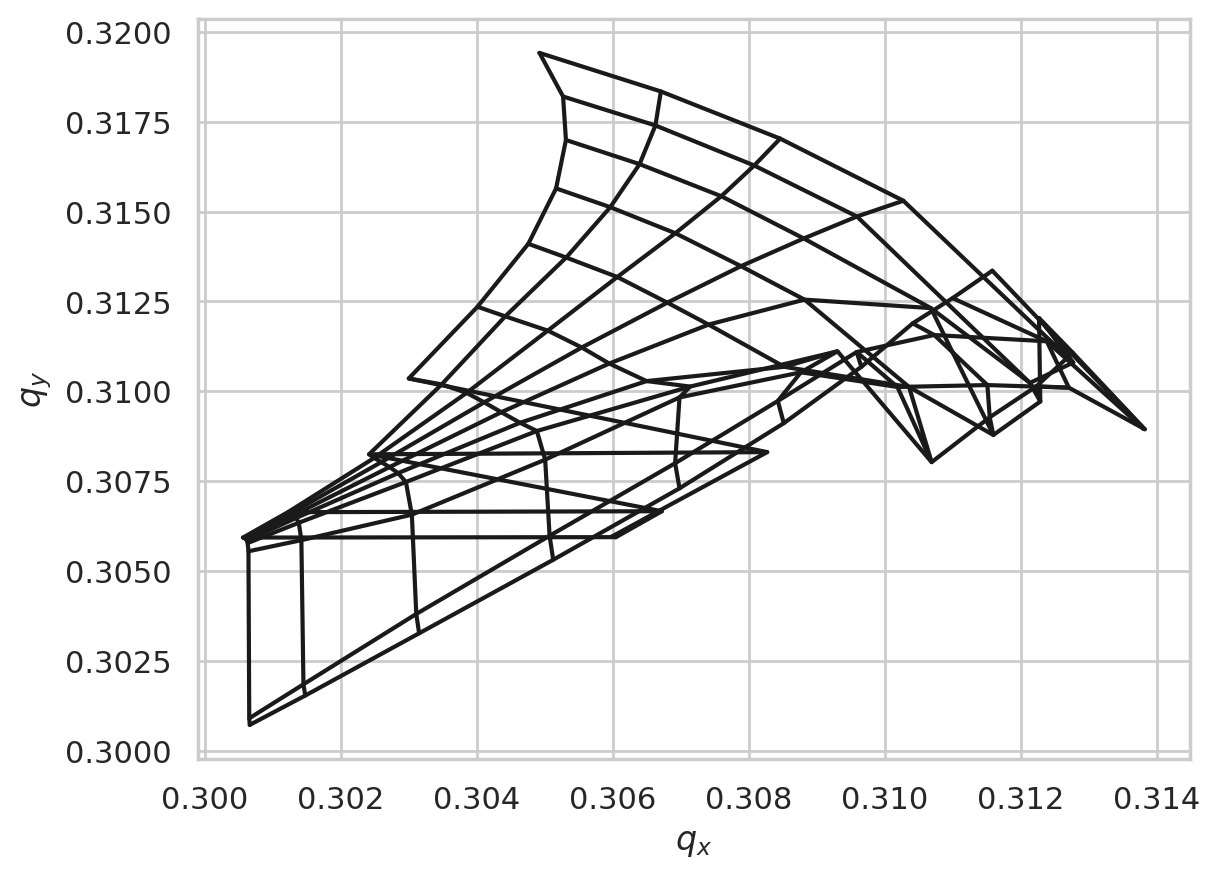

In [9]:
fp = line.get_footprint(nemitt_x=2.5e-6, nemitt_y=2.5e-6)
fp.plot()


Build manually a knob to tweak the BB elements values and recompute footprint

Tracking particles for footprint...
Done tracking.
Computing footprint...
Done computing footprint.
Tracking particles for footprint...
Done tracking.
Computing footprint...
Done computing footprint.


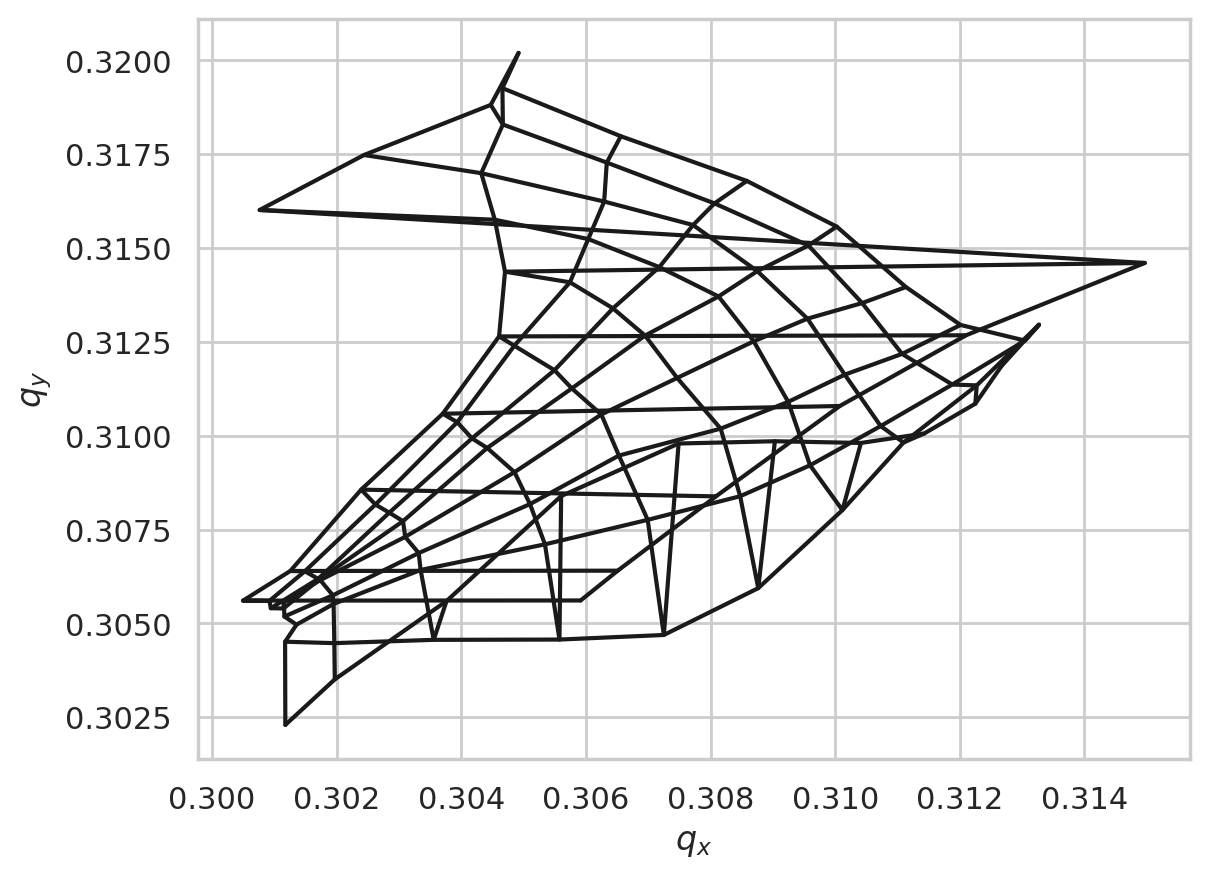

In [10]:
# Set knob for 'on_bb_charge'
for i, x in enumerate(line.element_refs._get_value()):
    if 'bb_lr' in x or 'bb_ho' in x:
        line.element_refs[x].scale_strength = line.vars['on_bb_charge']

fp = line.get_footprint(nemitt_x=2.5e-6,
                        nemitt_y=2.5e-6,linear_rescale_on_knobs=[xt.LinearRescale(knob_name='on_bb_charge', v0=0, dv=0.02)])
fp.plot()


Investigate to understand why footprint is not nice

In [11]:
# Compute list of elements affected by 'beambeam_scale'
count = 0
l_elements_beambeam_scale= []
for x in collider['lhcb1'].vars['beambeam_scale']._find_dependant_targets():
    if 'lhcb1' in str(x) and '.scale_strength' in str(x):
        l_elements_beambeam_scale.append(str(x).split("['lhcb1']['")[1].split("'].scale_strength")[0])
        count += 1
print(count, l_elements_beambeam_scale)

224 ['bb_lr.r5b1_05', 'bb_lr.r5b1_02', 'bb_ho.r5b1_05', 'bb_lr.l5b1_22', 'bb_lr.l5b1_09', 'bb_lr.r5b1_08', 'bb_lr.r1b1_24', 'bb_lr.r1b1_16', 'bb_lr.r5b1_16', 'bb_ho.l1b1_01', 'bb_lr.r1b1_19', 'bb_lr.r5b1_06', 'bb_ho.r2b1_05', 'bb_lr.r8b1_03', 'bb_lr.l8b1_20', 'bb_lr.l2b1_03', 'bb_lr.r8b1_07', 'bb_ho.r5b1_03', 'bb_lr.l8b1_01', 'bb_lr.l2b1_02', 'bb_lr.l1b1_02', 'bb_lr.r5b1_24', 'bb_lr.l8b1_09', 'bb_lr.l8b1_18', 'bb_lr.r8b1_17', 'bb_lr.r5b1_04', 'bb_lr.l2b1_10', 'bb_lr.r1b1_14', 'bb_lr.r2b1_02', 'bb_lr.r2b1_06', 'bb_ho.r1b1_05', 'bb_lr.l8b1_15', 'bb_lr.l5b1_08', 'bb_lr.r8b1_10', 'bb_lr.r5b1_19', 'bb_ho.c8b1_00', 'bb_lr.l8b1_03', 'bb_lr.r1b1_25', 'bb_lr.r1b1_11', 'bb_lr.l5b1_14', 'bb_lr.l1b1_24', 'bb_ho.l8b1_05', 'bb_lr.r1b1_07', 'bb_lr.r5b1_03', 'bb_lr.r8b1_19', 'bb_lr.r2b1_05', 'bb_lr.l1b1_21', 'bb_lr.l1b1_03', 'bb_lr.r1b1_03', 'bb_lr.r2b1_15', 'bb_lr.l5b1_03', 'bb_lr.r1b1_21', 'bb_lr.l1b1_18', 'bb_lr.l5b1_16', 'bb_lr.l1b1_17', 'bb_ho.l2b1_03', 'bb_lr.r8b1_12', 'bb_lr.l8b1_06', 'bb_lr.r8

In [12]:
# Compute list of LR+HO elements in my json file
count = 0
l_elements_on_bb_charge = []
for i, x in enumerate(line.element_refs._get_value()):
    if "bb_lr" in x or "bb_ho" in x:
        l_elements_on_bb_charge.append(str(x))
        count += 1

print(count, l_elements_on_bb_charge)


162 ['bb_lr.l5b1_25', 'bb_lr.l5b1_24', 'bb_lr.l5b1_23', 'bb_lr.l5b1_22', 'bb_lr.l5b1_21', 'bb_lr.l5b1_16', 'bb_lr.l5b1_15', 'bb_lr.l5b1_14', 'bb_lr.l5b1_13', 'bb_lr.l5b1_12', 'bb_lr.l5b1_11', 'bb_lr.l5b1_10', 'bb_lr.l5b1_09', 'bb_lr.l5b1_04', 'bb_lr.l5b1_03', 'bb_lr.l5b1_02', 'bb_lr.l5b1_01', 'bb_ho.l5b1_05', 'bb_ho.l5b1_04', 'bb_ho.l5b1_03', 'bb_ho.l5b1_02', 'bb_ho.l5b1_01', 'bb_ho.c5b1_00', 'bb_ho.r5b1_01', 'bb_ho.r5b1_02', 'bb_ho.r5b1_03', 'bb_ho.r5b1_04', 'bb_ho.r5b1_05', 'bb_lr.r5b1_01', 'bb_lr.r5b1_02', 'bb_lr.r5b1_03', 'bb_lr.r5b1_08', 'bb_lr.r5b1_09', 'bb_lr.r5b1_10', 'bb_lr.r5b1_11', 'bb_lr.r5b1_12', 'bb_lr.r5b1_13', 'bb_lr.r5b1_14', 'bb_lr.r5b1_15', 'bb_lr.r5b1_20', 'bb_lr.r5b1_21', 'bb_lr.r5b1_22', 'bb_lr.r5b1_23', 'bb_lr.r5b1_24', 'bb_lr.r5b1_25', 'bb_lr.l8b1_16', 'bb_lr.l8b1_15', 'bb_lr.l8b1_14', 'bb_lr.l8b1_13', 'bb_lr.l8b1_12', 'bb_lr.l8b1_11', 'bb_lr.l8b1_10', 'bb_lr.l8b1_09', 'bb_lr.l8b1_04', 'bb_lr.l8b1_03', 'bb_lr.l8b1_02', 'bb_lr.l8b1_01', 'bb_ho.l8b1_05', 'bb_ho.l8

In [13]:
# Find out the elements that differ
set_on_bb_charge = set(l_elements_on_bb_charge)
set_beambeam_scale = set(l_elements_beambeam_scale)

# Get elements in set_on_bb_charge but not in set_beambeam_scale
set_in_on_bb_charge_but_not_beambeam_scale = set_on_bb_charge - set_beambeam_scale

# Get elements in set_beambeam_scale but not in set_on_bb_charge
set_in_beambeam_scale_but_not_on_bb_charge = set_beambeam_scale - set_on_bb_charge

print(set_in_on_bb_charge_but_not_beambeam_scale)
print(set_in_beambeam_scale_but_not_on_bb_charge)
print(len(set_in_beambeam_scale_but_not_on_bb_charge))


set()
{'bb_lr.l2b1_16', 'bb_lr.r1b1_17', 'bb_lr.l5b1_18', 'bb_lr.r8b1_16', 'bb_lr.r5b1_07', 'bb_lr.l8b1_06', 'bb_lr.r2b1_09', 'bb_lr.l8b1_05', 'bb_lr.r1b1_07', 'bb_lr.r8b1_19', 'bb_lr.l2b1_17', 'bb_lr.l2b1_03', 'bb_lr.r1b1_06', 'bb_lr.r2b1_07', 'bb_lr.l1b1_08', 'bb_lr.r8b1_04', 'bb_lr.l1b1_05', 'bb_lr.l8b1_20', 'bb_lr.l1b1_07', 'bb_lr.r5b1_16', 'bb_lr.r1b1_19', 'bb_lr.l5b1_05', 'bb_lr.r5b1_04', 'bb_lr.r1b1_16', 'bb_lr.l8b1_19', 'bb_lr.l8b1_07', 'bb_lr.l5b1_19', 'bb_lr.r5b1_06', 'bb_lr.l1b1_06', 'bb_lr.r8b1_06', 'bb_lr.l1b1_19', 'bb_lr.r5b1_18', 'bb_lr.l5b1_20', 'bb_lr.l5b1_06', 'bb_lr.l5b1_08', 'bb_lr.l2b1_02', 'bb_lr.r1b1_18', 'bb_lr.l2b1_14', 'bb_lr.r5b1_19', 'bb_lr.l2b1_15', 'bb_lr.r5b1_05', 'bb_lr.l1b1_17', 'bb_lr.l2b1_04', 'bb_lr.r2b1_19', 'bb_lr.r8b1_07', 'bb_lr.l5b1_17', 'bb_lr.r5b1_17', 'bb_lr.r2b1_08', 'bb_lr.r8b1_18', 'bb_lr.r2b1_10', 'bb_lr.r8b1_05', 'bb_lr.r1b1_05', 'bb_lr.l8b1_17', 'bb_lr.l8b1_18', 'bb_lr.r8b1_17', 'bb_lr.l1b1_18', 'bb_lr.l8b1_08', 'bb_lr.l2b1_05', 'bb_lr.

In [18]:
# Check that the list of elements that I have for 'on_bb_charge' is correct
alternative_list_on_bb_charge = [x for x in line.element_names if "bb_lr" in x or "bb_ho" in x]
set(alternative_list_on_bb_charge) == set(l_elements_on_bb_charge)


True